## Libraries

In [99]:
# Pandas --> Data Frames
import pandas as pd

# numpy --> scientific computing with Python
import numpy as np

# matplotlib --> graphing library
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn --> makes matplotlib prettier
import seaborn as sb

## Import Data

In [5]:
data = pd.read_csv("/Users/carriesmith/Dropbox/GA/datascience/salary_prediction/data/train.csv")

In [7]:
data.head(n=2)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk


In [8]:
print len(data), 'rows'

10000 rows


In [9]:
print data.columns.values

['Id' 'Title' 'FullDescription' 'LocationRaw' 'LocationNormalized'
 'ContractType' 'ContractTime' 'Company' 'Category' 'SalaryRaw'
 'SalaryNormalized' 'SourceName']


## Categorical Features

In [16]:
cols = data.columns

for c in cols:
    if type(data[c][0]) == str and c != "FullDescription":
        print c
        print data[c].value_counts(dropna = False).head(n=10)

Title
Staff Nurse                     78
Home Manager                    61
Dental Nurse                    39
Deputy Manager                  32
Project Manager                 24
RGN Nurse                       23
Business Development Manager    19
Registered Nurse                18
Nursing Home Manager            17
Mechanical Design Engineer      16
dtype: int64
LocationRaw
London            637
UK                335
Belfast           225
Leeds             166
Manchester        145
City of London     98
Surrey             95
Hampshire          81
Sheffield          77
West Midlands      74
dtype: int64
LocationNormalized
UK            1337
London         893
Manchester     281
Leeds          238
Belfast        227
Birmingham     140
The City       135
Surrey         129
Sheffield      115
Hampshire      103
dtype: int64
ContractTime
NaN          5263
permanent    4132
contract      605
dtype: int64
Company
NaN                    4049
JOBG8                   449
Fresh Partnership   

### Recodes

#### NaN to "Missing"

In [41]:
cols = data.columns
cols[cols != 'SalaryNormalized']
data[cols[cols != 'SalaryNormalized']].fillna("Missing")

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Missing,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,Missing,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Missing,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Missing,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Missing,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,Missing,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,Missing,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,Missing,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,Missing,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,Missing,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,cv-library.co.uk


### Reducing # of Categories

Simplify some of the categorical factors with a ton of different levels.

#### Title

In [67]:
title_counts = data['Title'].value_counts(dropna = False)
common_titles = title_counts[title_counts>10].index.values

In [68]:
data['TitleO'] = np.where( data['Title'].isin(common_titles), data['Title'], 'Other')

In [69]:
print data['TitleO'].value_counts(dropna = False)

Other                           9537
Staff Nurse                       78
Home Manager                      61
Dental Nurse                      39
Deputy Manager                    32
Project Manager                   24
RGN Nurse                         23
Business Development Manager      19
Registered Nurse                  18
Nursing Home Manager              17
Sales Executive                   16
Mechanical Design Engineer        16
Registered General Nurse          15
Web Developer                     15
Telesales Executive               15
Deputy Home Manager               15
Management Accountant             14
Accounts Assistant                12
Quality Engineer                  12
RGN                               11
English Teacher                   11
dtype: int64


#### Location

In [71]:
location_counts = data['LocationNormalized'].value_counts(dropna = False)
common_locations = location_counts[location_counts>50].index.values

In [72]:
data['LocationO'] = np.where( data['LocationNormalized'].isin(common_locations), data['LocationNormalized'], 'Other')

In [73]:
print data['LocationO'].value_counts(dropna = False)

Other                  5004
UK                     1337
London                  893
Manchester              281
Leeds                   238
Belfast                 227
Birmingham              140
The City                135
Surrey                  129
Sheffield               115
Hampshire               103
South East London       100
Bristol                  93
West Midlands            85
Hertfordshire            77
Liverpool                76
Nottingham               73
Berkshire                73
Cheshire                 69
Bradford                 67
Newcastle Upon Tyne      65
Cambridge                63
Leicester                59
Wales                    59
West Yorkshire           58
Lancashire               58
Reading                  55
Essex                    55
Oxfordshire              55
Southampton              54
Glasgow                  53
Cambridgeshire           51
dtype: int64


In [74]:
#### Company

In [83]:
company_counts = data['Company'].value_counts(dropna = False)
common_companies = company_counts[company_counts>30].index.values
data['CompanyO'] = np.where( data['Company'].isin(common_companies), data['Company'], 'Other')

In [82]:
data['CompanyO'].value_counts(dropna = False)

NaN                                         4049
Other                                       3458
JOBG8                                        449
Fresh Partnership                            262
ARRAY                                        218
Clear Selection                              127
Chef Results                                 125
Triumph Consultants                           99
JHR                                           75
Castle Recruitment                            74
The Works Uk Ltd                              69
Recruitment North West                        62
W5 Recruitment                                61
ACS Recruitment Consultants Ltd               59
Red Dot Recruitment                           56
mgi recruitment                               54
EMPLOYMENT SPECIALISTS LTD                    53
Questech Recruitment Ltd                      51
Petrie Recruitment                            49
Albior Financial Recruitment                  48
Switch Recruitment S

#### Source Name

In [87]:
source_counts = data['SourceName'].value_counts(dropna = False)
common_Sources = source_counts[source_counts>30].index.values
data['SourceO'] = np.where( data['SourceName'].isin(common_Sources), data['SourceName'], 'Other')

In [88]:
data['SourceO'].value_counts(dropna = False)

careworx.co.uk                    2946
MyUkJobs                          1559
cv-library.co.uk                   874
theitjobboard.co.uk                643
fish4.co.uk                        441
planetrecruit.com                  436
totaljobs.com                      403
thecareerengineer.com              312
hays.co.uk                         293
caterer.com                        264
Other                              252
recruitni.com                      218
strike-jobs.co.uk                  188
jobs.catererandhotelkeeper.com     152
Multilingualvacancies              139
nijobfinder.co.uk                  131
Jobcentre Plus                     122
jobsineducation.co.uk               99
hotrecruit.com                      94
leisurejobs.com                     84
rengineeringjobs.com                60
jobsfinancial.com                   58
staffnurse.com                      54
cwjobs.co.uk                        52
Jobs24                              48
eFinancialCareers        

#### Managers

In [94]:
data['Title'].value_counts(dropna = False).head(n=20)

Staff Nurse                     78
Home Manager                    61
Dental Nurse                    39
Deputy Manager                  32
Project Manager                 24
RGN Nurse                       23
Business Development Manager    19
Registered Nurse                18
Nursing Home Manager            17
Mechanical Design Engineer      16
Sales Executive                 16
Deputy Home Manager             15
Registered General Nurse        15
Telesales Executive             15
Web Developer                   15
Management Accountant           14
Quality Engineer                12
Accounts Assistant              12
RGN                             11
English Teacher                 11
dtype: int64

In [95]:
data['Manager'] = np.where( data['Title'].str.contains("Manager"), 1, 0)

In [96]:
data.loc[data['Manager']==1,:]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,TitleO,LocationO,CompanyO,OurceO,SourceO,Manager
29,25556432,"General Manager Funky, Cool Restaurant Concep...","Senior General Manager – Funky, Cool, Casual R...",West London London South East,East Sheen,NaN,NaN,Bee Recruitment London Ltd,Hospitality & Catering Jobs,"From 28,000 to 35,000 per annum",31500,caterer.com,Other,Other,Other,caterer.com,caterer.com,1
30,25892031,MICE Sales and Marketing Manager,"Our client, a national hotel chain is seeking ...",Buckinghamshire South East,Buckinghamshire,NaN,NaN,Chess Partnership,Hospitality & Catering Jobs,"30,000 per annum plus bonus and package",30000,caterer.com,Other,Other,Other,caterer.com,caterer.com,1
34,27527077,Business Development Manager,"The Company: Our client are a full service, cr...","Tyne Wear, North East",Newcastle Upon Tyne,NaN,permanent,Asset Appointments,IT Jobs,18000 - 24000/annum plus commission OTE 50-60k,21000,cv-library.co.uk,Business Development Manager,Newcastle Upon Tyne,Other,cv-library.co.uk,cv-library.co.uk,1
48,29571506,"Deputy Manager Nevill Crest and Gun, Eridge G...",We are looking for an experienced Deputy Manag...,"Eridge Green, East Sussex",UK,NaN,permanent,Brunning & Price,Travel Jobs,"Salary package around 24,000",24000,leisurejobs.com,Other,UK,Other,leisurejobs.com,leisurejobs.com,1
71,32359589,Assistant Manager New Opening – November 2012...,Make your Name at Marston's Assistant Manager ...,"Didsbury, Manchester",Didsbury,NaN,permanent,Marston's Inns And Taverns,Travel Jobs,Up to 7.40 p.h. & Up to 46 Hours p.w.,14208,leisurejobs.com,Other,Other,Other,leisurejobs.com,leisurejobs.com,1
73,32423204,Key Account Manager,"Our client, a fantastic venue in London is see...",London South East,South East London,NaN,NaN,Chess Partnership,Hospitality & Catering Jobs,"From 40,000 to 45,000 per annum plus package",42500,caterer.com,Other,South East London,Other,caterer.com,caterer.com,1
82,33317553,Assistant Manager Near Essex Fresh Food Pub Up...,Assistant Manager Near Essex Fresh Food Pub Up...,Essex South East,UK,NaN,NaN,Clear Selection,Hospitality & Catering Jobs,18000 per annum,18000,caterer.com,Other,UK,Clear Selection,caterer.com,caterer.com,1
91,34770862,"Assistant Manager Crown, Llay",Make your Name at Marston's Assistant Manager ...,"Llay, Wrecsam (Wrexham)",UK,NaN,permanent,Marston's Inns And Taverns,Travel Jobs,Up to 7.40 p.h. & Up to 46 Hours p.w.,14208,leisurejobs.com,Other,UK,Other,leisurejobs.com,leisurejobs.com,1
98,35272754,Assistant Manager Suffolk Coastal Restaurant ...,Assistant Manager Suffolk Coastal Restaurant ...,Suffolk East Anglia,UK,NaN,NaN,Clear Selection,Hospitality & Catering Jobs,19000 per annum,19000,caterer.com,Other,UK,Clear Selection,caterer.com,caterer.com,1
99,35450486,Cluster Revenue Manager,Our client is part of an international hotel c...,Hertfordshire South East,UK,NaN,NaN,Chess Partnership,Hospitality & Catering Jobs,"Up to 45,000 plus excellent package",45000,caterer.com,Other,UK,Other,caterer.com,caterer.com,1


## Explore Outcome Measure

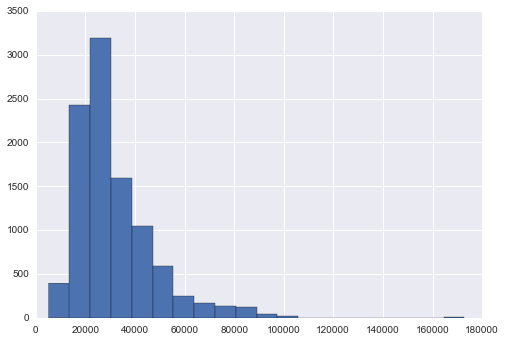

In [101]:
data.SalaryNormalized.hist(bins = 20)

In [102]:
data[data['SalaryNormalized'] > 100000]

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,TitleO,LocationO,CompanyO,OurceO,SourceO,Manager
228,46626980,OOH GP Job Ipswich,OOH GP Job Ipswich “MedCo (Europe) Ltd are cur...,"Ipswich, Suffolk",Ipswich,NaN,NaN,NaN,Healthcare & Nursing Jobs,75.00 to 75.00 per hour,144000,careworx.co.uk,Other,Other,NaN,careworx.co.uk,careworx.co.uk,0
229,46626981,OOH GP Job Clevedon,OOH GP Job Clevedon “MedCo (Europe) Ltd are cu...,"Clevedon, Somerset",Clevedon,NaN,NaN,NaN,Healthcare & Nursing Jobs,75.00 to 75.00 per hour,144000,careworx.co.uk,Other,Other,NaN,careworx.co.uk,careworx.co.uk,0
2390,55048296,Quant Modeller Credit,The primary focus of the position is on risk n...,London,London,NaN,NaN,The Emerald Group,Accounting & Finance Jobs,"Up to 150,000 basic + excellent bonus",150000,eFinancialCareers,Other,London,Other,eFinancialCareers,eFinancialCareers,0
3466,58501895,"LOCUM GP’s WANTED IN HIGH WYCOME, BUCKINGHAMSH...","Location: High Wycombe, Buckinghamshire Start:...","High Wycombe, Buckinghamshire",High Wycombe,part_time,NaN,NaN,Healthcare & Nursing Jobs,70 to 70 per hour,134400,careworx.co.uk,Other,Other,NaN,careworx.co.uk,careworx.co.uk,0
4395,61728786,"Locum GP’s required, Ongoing, ****/Day, Readin...","Location: Reading, Berkshire Start: Asap End: ...","Reading, Berkshire",Reading,NaN,NaN,NaN,Healthcare & Nursing Jobs,70 to 70 per hour,134400,careworx.co.uk,Other,Reading,NaN,careworx.co.uk,careworx.co.uk,0
6630,63831114,Consultant A&E,A Leading NHS Trust in North West England is s...,North West,North West London,NaN,contract,NaN,Healthcare & Nursing Jobs,Up to 90 per hour,172800,hays.co.uk,Other,Other,NaN,hays.co.uk,hays.co.uk,0
6633,63831151,Consultant Medicine,"Become part of something new, exciting and pio...",North West,North West London,NaN,contract,NaN,Healthcare & Nursing Jobs,Up to 90 per hour,172800,hays.co.uk,Other,Other,NaN,hays.co.uk,hays.co.uk,0
6634,63831160,Consultant Medicine,"Become part of something new, exciting and pio...",London,London,NaN,contract,NaN,Healthcare & Nursing Jobs,Up to 90 per hour,172800,hays.co.uk,Other,London,NaN,hays.co.uk,hays.co.uk,0
6635,63831278,Consultant A&E,A Leading NHS Trust in Yorkshire is seeking fo...,Yorkshire,Yorkshire and Humberside,NaN,contract,NaN,Healthcare & Nursing Jobs,Up to 90 per hour,172800,hays.co.uk,Other,Other,NaN,hays.co.uk,hays.co.uk,0
7055,64528984,Consultant Paediatrician,A Leading NHS Trust in North West England is s...,North West,North West London,NaN,contract,NaN,Healthcare & Nursing Jobs,Up to 90 per hour,172800,hays.co.uk,Other,Other,NaN,hays.co.uk,hays.co.uk,0
